In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import ttest_ind, mannwhitneyu, norm, pearsonr, spearmanr
import seaborn as sns
from matplotlib import pyplot as plt 

In [2]:
def statistical_analysis (r, q=[0.1,0.25,0.3,0.4,0.5,0.6,0.75,0.9]):
    if (type(r) is not list) & (type(r) is not tuple):
        print('Нужен список или кортеж!')
        return

    if len(r) <= 4:
        print('Требуется более длинный ряд')
        return

    r = pd.Series(r)
    print("Ряд r -") 
    print(r)
    print()
    mean = r.mean()
    print("Среднее -", mean)
    var = r.var()
    print("Дисперсия -", var)
    std = r.std()
    print("Стандартное отклонение -", std)
    qs = np.quantile(r,q)
    print("Рассчитанные квантили-", qs)
    print()
    for i in q:
        if i == 0.25:
            print ("Первый квартиль =", np.quantile(r, i))
        if i == 0.5:
            print ("Медиана =", np.quantile(r, i))
        if i == 0.75:
            print ("Третий квартиль =", np.quantile(r, i))
        if i == 0.1:
            print ("Первый дециль =", np.quantile(r, i))
        if i == 0.2:
            print ("Второй дециль =", np.quantile(r, i))
        if i == 0.3:
            print ("Третий дециль =", np.quantile(r, i))
        if i == 0.4:
            print ("Четвертый дециль =", np.quantile(r, i))
        if i == 0.6:
            print ("Шестой дециль =", np.quantile(r, i))
        if i == 0.7:
            print ("Седьмой дециль =", np.quantile(r, i))
        if i == 0.8:
            print ("Восьмой дециль =", np.quantile(r, i))
        if i == 0.9:
            print ("Девятый дециль =", np.quantile(r, i))
    
    sns.histplot(r), plt.xlabel('Ряд r'), plt.ylabel('Частота'), plt.title('Распределение ряда')
    
    return


In [3]:
def test_calc(r1, r2):
    s, p = ttest_ind(r1, r2)
    print("Среднее по контрольной группе =", r1.mean())
    print("Среднее по тестовой группе =", r2.mean())
    print("Значение стат.критерия =", s)
    print("Значение p_value =", p)
    print()
    if p > 0.05:
        print("Гиптеза H0 принимается")
    else:
        print("Гиптеза H0 отвергается в пользу гипотезы H1")
    return 

 

In [4]:
def mann_whitney_func(r1, r2):
    s, p = mannwhitneyu(r1, r2, alternative = "two-sided")
    print("Значение стат.критерия =", s)
    print("Значение p_value =", p)
    print()
    if p > 0.05:
        print('Распределения равны')
    else:
        print('Распределения не равны')
    return 



In [5]:
data = pd.read_csv('Dataset_AB_TEST.csv', sep = ';')
data

,id_client,id_group,sum_pay,id_point,months_reg
0,1420218,test,3288.0,1199.0,8
1,1390221,control,1267.0,1182.0,11
2,1363404,control,4259.0,1178.0,2
3,1370042,test,7211.0,1179.0,3
4,1360376,control,760.0,1178.0,14
...,...,...,...,...,...
10971,1359021,control,799.0,1178.0,3
10972,1363347,control,4825.0,1178.0,6
10973,1373031,test,673.0,1179.0,1
10974,1370292,test,1120.0,1179.0,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10976 entries, 0 to 10975
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_client   10976 non-null  int64  
 1   id_group    10902 non-null  object 
 2   sum_pay     10849 non-null  float64
 3   id_point    10895 non-null  float64
 4   months_reg  10976 non-null  int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 428.9+ KB


In [8]:
data.isnull().sum()

id_client     0
id_group      0
sum_pay       0
id_point      0
months_reg    0
dtype: int64

In [7]:
data.dropna(inplace=True)

Ряд r -
0        3288.0
1        1267.0
2        4259.0
3        7211.0
4         760.0
          ...  
10835     799.0
10836    4825.0
10837     673.0
10838    1120.0
10839    5348.0
Length: 10840, dtype: float64

Среднее - 3568.7580258302582
Дисперсия - 8568932.941996625
Стандартное отклонение - 2927.27397795229
Рассчитанные квантили- [  410.     1250.75   1590.     2329.6    3173.5    3934.     5356.5
  7088.2    7805.1    8041.     8453.64   9043.66   9809.76  21046.075]

Первый дециль = 410.0
Первый квартиль = 1250.75
Третий дециль = 1590.0
Четвертый дециль = 2329.6000000000004
Медиана = 3173.5
Шестой дециль = 3934.0
Третий квартиль = 5356.5
Девятый дециль = 7088.200000000001


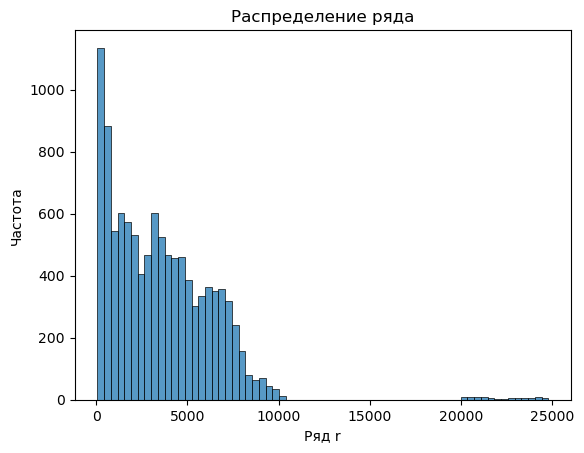

In [9]:
statistical_analysis(tuple(data['sum_pay']),q=[.1,.25,.3,.4,.5,.6,.75,.9,.95,.96,.97,.98,.99,.995])

In [10]:
data = data[data['sum_pay'] < 20000]

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sum_pay', ylabel='Density'>

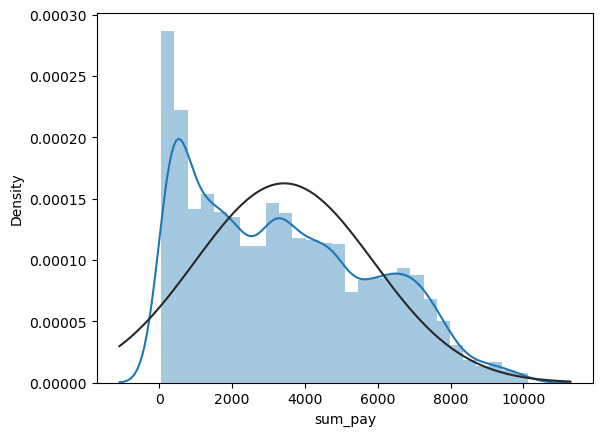

In [11]:
sns.distplot(data['sum_pay'], fit= norm)

In [12]:
A = data[data['id_group'] == 'control']['sum_pay']
B = data[data['id_group'] == 'test']['sum_pay']

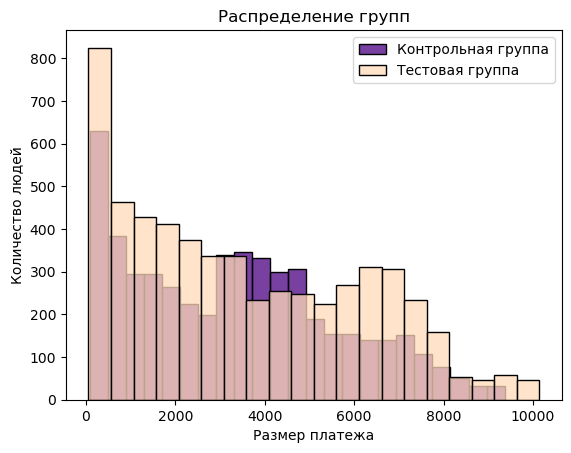

Среднее по контрольной группе = 3339.535408560311
Среднее по тестовой группе = 3515.361323607899
Значение стат.критерия = -3.7141912292177888
Значение p_value = 0.0002048855494553075

Гиптеза H0 отвергается в пользу гипотезы H1


Значение стат.критерия = 14141330.5
Значение p_value = 0.05842125879702285

Распределения равны


In [13]:
def show_hist (r1, r2, graph_titile):
    ax1 = sns.histplot(r1, color = 'indigo')          
    ax2 = sns.histplot(r2, color ='peachpuff')
    ax1.set(xlabel = 'Размер платежа', ylabel = 'Количество людей', title = graph_titile) 
    plt.legend(labels = ["Контрольная группа", "Тестовая группа"])
    plt.show()

show_hist(A, B, 'Распределение групп') 

test_calc(A,B)
print()
print()
mann_whitney_func(A,B)

,id_group,sum_pay,id_client
0,control,17165212.0,5140
1,test,19759846.0,5621


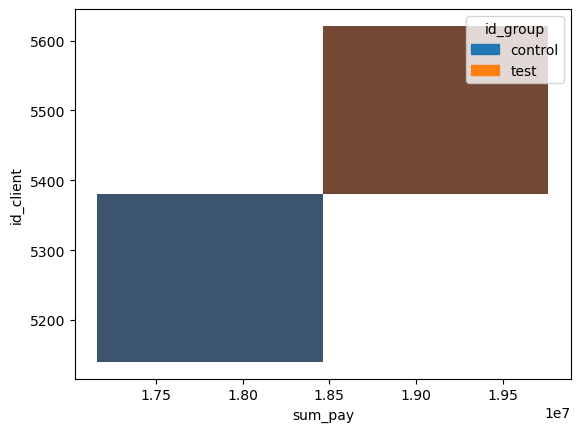

In [14]:
df = data.groupby('id_group').agg({'sum_pay':'sum', 'id_client':'count'}).reset_index()

sns.histplot(df,  x = 'sum_pay', y = 'id_client', hue='id_group') 

df

In [15]:
df1 = data.groupby(['id_point','id_group']).agg({'sum_pay':'mean', 'id_client':'count'}).reset_index()
df1

,id_point,id_group,sum_pay,id_client
0,1178.0,control,3036.214732,2403
1,1178.0,test,2936.386949,2406
2,1179.0,control,3331.310548,1697
3,1179.0,test,3421.826934,1745
4,1182.0,control,4036.942688,1012
5,1182.0,test,4945.129474,950
6,1186.0,control,4546.000000,23
7,1186.0,test,3638.400000,40
8,1188.0,control,5202.000000,5
9,1188.0,test,4946.000000,4


In [16]:
df2 = data[data['id_point'].isin([1179,1178,1182])]

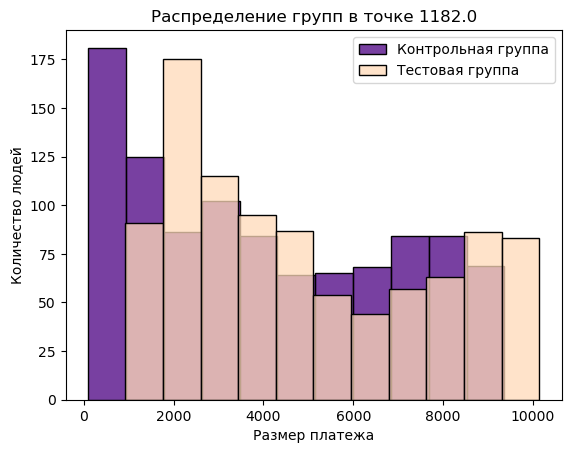

Т-Тест на равенство средних:
Среднее по контрольной группе = 4036.9426877470355
Среднее по тестовой группе = 4945.12947368421
Значение стат.критерия = -7.172588995409098
Значение p_value = 1.0387447468996453e-12

Гиптеза H0 отвергается в пользу гипотезы H1

Тест Манна-Уитни на равенство распределений:
Значение стат.критерия = 382818.5
Значение p_value = 5.946812205351181e-15

Распределения не равны





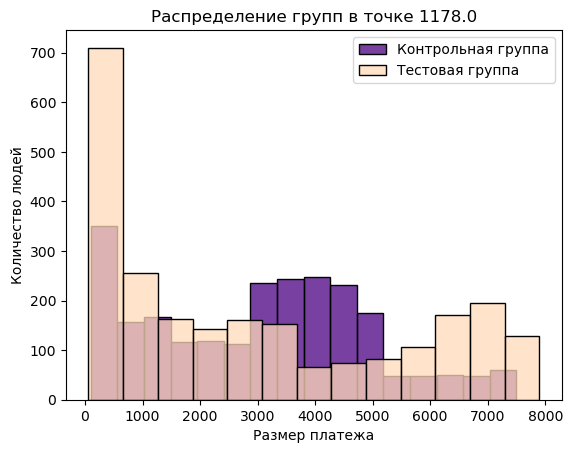

Т-Тест на равенство средних:
Среднее по контрольной группе = 3036.214731585518
Среднее по тестовой группе = 2936.386949293433
Значение стат.критерия = 1.5338932633911708
Значение p_value = 0.1251217226713009

Гиптеза H0 принимается

Тест Манна-Уитни на равенство распределений:
Значение стат.критерия = 3122337.5
Значение p_value = 1.5133330174771163e-06

Распределения не равны





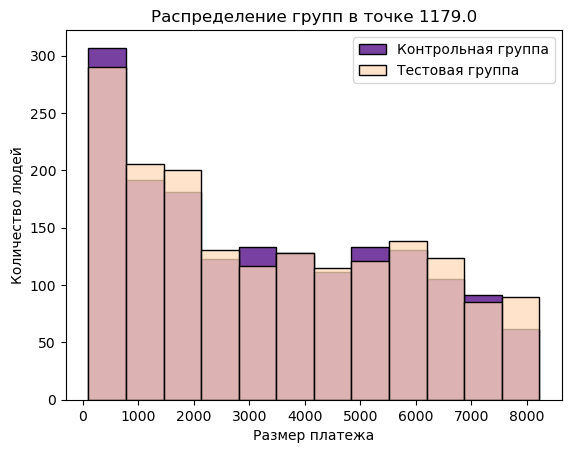

Т-Тест на равенство средних:
Среднее по контрольной группе = 3331.3105480259283
Среднее по тестовой группе = 3421.826934097421
Значение стат.критерия = -1.1225576641441302
Значение p_value = 0.2617037465196552

Гиптеза H0 принимается

Тест Манна-Уитни на равенство распределений:
Значение стат.критерия = 1447666.5
Значение p_value = 0.2580763851815786

Распределения равны




In [186]:
for i in df2.id_point.unique():
    data_loc = df2[df2['id_point'] == i]
    print()
    r1 = data_loc[data_loc['id_group'] == 'control']['sum_pay']
    r2 = data_loc[data_loc['id_group'] == 'test']['sum_pay']
        
    
    show_hist (r1, r2, 'Распределение групп в точке ' + str(i))
    print('Т-Тест на равенство средних:')
    test_calc(r1,r2)
    print()
    print('Тест Манна-Уитни на равенство распределений:')
    mann_whitney_func(r1,r2)
    print()
    print()
     
    

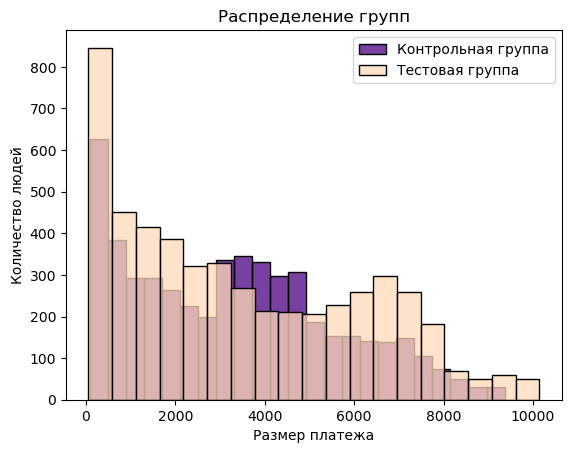

Среднее по контрольной группе = 3332.2856025039123
Среднее по тестовой группе = 3476.555185257793
Значение стат.критерия = -2.944489700132704
Значение p_value = 0.0032421688825253897

Гиптеза H0 отвергается в пользу гипотезы H1


Значение стат.критерия = 12944567.5
Значение p_value = 0.5298806408171715

Распределения равны


In [17]:
C = df2[df2['id_group'] == 'control']['sum_pay']
D = df2[df2['id_group'] == 'test']['sum_pay']

show_hist(C, D, 'Распределение групп') 
test_calc(C, D)
print()
print()
mann_whitney_func(C, D)

In [18]:
reg_data = data.groupby('months_reg')['sum_pay'].mean().reset_index()
reg_data

,months_reg,sum_pay
0,0,980.297092
1,1,1085.724051
2,2,1777.822569
3,3,2373.030285
4,4,3762.609551
5,5,4053.715359
6,6,4319.829308
7,7,5613.047913
8,8,5573.013595
9,9,5946.964169


In [19]:
data.groupby('months_reg').agg({'sum_pay':'mean', 'id_client':'count'}).reset_index()

,months_reg,sum_pay,id_client
0,0,980.297092,791
1,1,1085.724051,790
2,2,1777.822569,1347
3,3,2373.030285,1684
4,4,3762.609551,1068
5,5,4053.715359,1198
6,6,4319.829308,1242
7,7,5613.047913,647
8,8,5573.013595,662
9,9,5946.964169,307


In [20]:
reg_data = reg_data[reg_data['months_reg'] < 13]
reg_data

,months_reg,sum_pay
0,0,980.297092
1,1,1085.724051
2,2,1777.822569
3,3,2373.030285
4,4,3762.609551
5,5,4053.715359
6,6,4319.829308
7,7,5613.047913
8,8,5573.013595
9,9,5946.964169


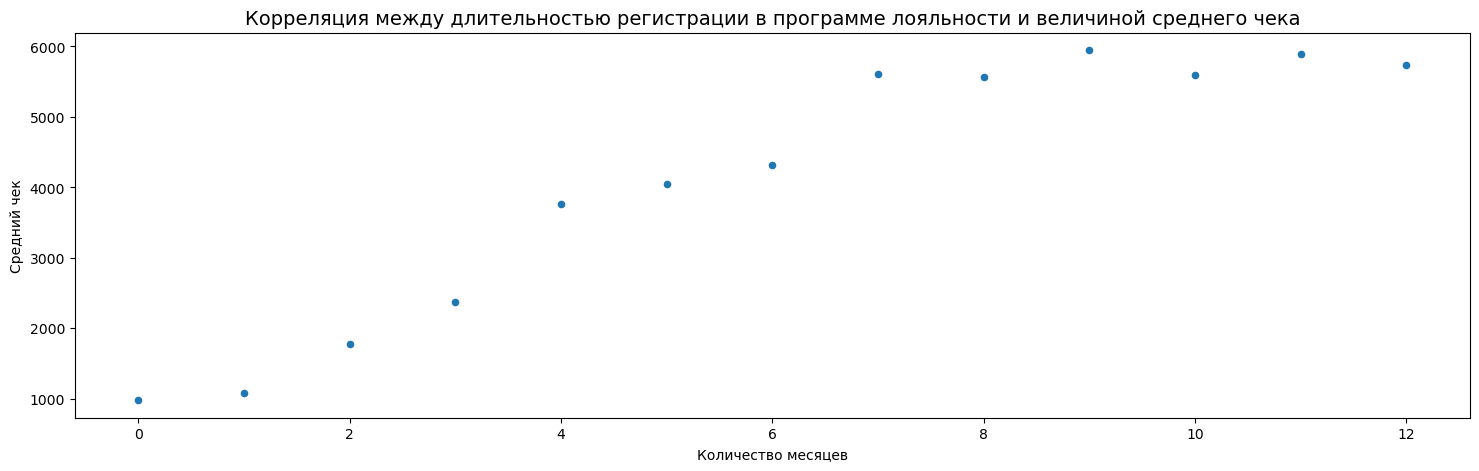

In [21]:
plot = reg_data.plot(x='months_reg', y='sum_pay', kind='scatter', figsize=(18,5))
plt.title('Корреляция между длительностью регистрации в программе лояльности и величиной среднего чека', fontsize=14)
plt.xlabel("Количество месяцев")
plt.ylabel("Средний чек")
plt.show()

In [22]:
print(pearsonr(reg_data['months_reg'],reg_data['sum_pay']))
print(spearmanr(reg_data['months_reg'],reg_data['sum_pay']))


PearsonRResult(statistic=0.9427421489389172, pvalue=1.4036877772496787e-06)
SpearmanrResult(correlation=0.9395604395604396, pvalue=1.8782484299388895e-06)
